# Linear regression: Housing Price Prediction

In [4]:
pip install tensorflow

  Using cached tensorflow-2.12.0-cp311-cp311-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp311-cp311-win_amd64.whl (272.9 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.8.0-cp311-cp311-win_amd64.whl (2.6 MB)
  Using cached jax-0.4.8-py3-none-any.whl
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached grpcio-1.54.0-cp311-cp311-win_amd64.whl (4.1 MB)
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
  Using cached ml_dtypes-0.1.0-cp311-cp311-win_amd64.whl (120 kB)
  Using cached google_auth-2.17.3-py2.py3-none-any.whl (178 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Using cached Markdown-3.4.3-py3-none-any.whl (93 kB)
  Using cached requests-2.30.0-py3-none-any.whl (62 kB)
  Using cached cachetools-5.3.0-p


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf

from tensorflow import keras #cleaner and shorter weight
from tensorflow.keras import layers #e.g. hidden/ output...
from tensorflow.keras.datasets import boston_housing #data
import time

This notebook uses the classic [Boston Housing](http://lib.stat.cmu.edu/datasets/boston) Dataset and builds a model to predict the housing price in the suburban area of Boston.

\### Get the data
First download the dataset. Boston dataset is a build-in dataset in Keras. Notice that this build-in dataset has already been cleaned and preprocessed (normalized) by keras.

In [7]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

#dataset, which is already separated in train and test data.
#The only parameter (path) is basically where to store the downloaded dataset.

57026/57026 [==============================] - 0s 1us/step


In [8]:
#check training and test size
print('Training data : {}'.format(train_data.shape))
print('Training target : {}'.format(train_targets.shape))
print('Test data : {}'.format(test_data.shape))
print('Test target : {}'.format(test_targets.shape))

#so can know the regression model: y = g(β0 + β1x1 + ......+ β13x13) : 13 inputs  --> 找β > 1 output

Training data : (404, 13)
Training target : (404,)
Test data : (102, 13)
Test target : (102,)


## The model

### Build the model

Let's build our model. Here, we'll use a `Sequential` model with an output layer that returns a single, continuous value. The model building steps are wrapped in a function, `build_model`, since we'll create a second model, later on.

In [9]:
# methoud1: directly
# Adam
model = keras.Sequential([layers.Dense(1, input_shape=[train_data.shape[1]])])
#dense: fully connected, CNN就不是dense
#1是因為output只有1個
optimizer = tf.keras.optimizers.Adam(0.001)
#use Adam optimizer here, 0.001 is learning_rate, is default value
#https://keras.io/api/optimizers/adam/
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mse'])
#loss function: tell it is regression problem by MSE, metrics is model evaluation performance

In [10]:
#SGD
model_1 = keras.Sequential([layers.Dense(1, input_shape=[train_data.shape[1]])])

optimizer = tf.keras.optimizers.SGD(0.0000004)

model_1.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mse'])

### Build the model

We can also wrap the model in a function, `build_model`, if we want to create a second model, later on.

In [11]:
# methoud2: writing function for future use
# Adam
def build_model():
    model = keras.Sequential([layers.Dense(1, input_shape=[train_data.shape[1]])])
    optimizer = tf.keras.optimizers.Adam(0.001)
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mse'])
    return model

### Inspect the model

Use the `.summary` method to print a simple description of the model

In [12]:
model.summary()
#1 output layer
#number of parameters: 13 + 1(bias)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [13]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


### Train the model

Train the model for 2000 epochs, and record the training accuracy in the `history` object.

In [14]:
# Display training progress by printing a single dot for each completed epoch
# Adam
class PrintLoss(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs):
        if epoch == 0: self.time = time.monotonic()
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            # calculate training time
            t = time.monotonic() - self.time
            # if validation set is included, its loss is recorded in logs['val_loss']
            print('| Epoch {:4} | training time {:6.2f}s | train loss {:6.2f} |'
                  .format(epoch, t, logs['loss']))
EPOCHS = 3001 #k
#only with 2900, so we set = 3001
#e.g. sample size = n, total: k*n iterations
#try and see when will converge

history = model.fit(train_data, train_targets,
                    epochs=EPOCHS, verbose=0,
                    callbacks=[PrintLoss()])
#if batch_size=500，就不會converge (train loss) / if = 404 --> full data set
#SGD is very sensitive (when chooseing different stepsize)

| Epoch    0 | training time   0.83s | train loss 10898.11 |
| Epoch  100 | training time   3.45s | train loss 168.17 |
| Epoch  200 | training time   5.95s | train loss  67.88 |
| Epoch  300 | training time   8.39s | train loss  48.78 |
| Epoch  400 | training time  10.89s | train loss  42.19 |
| Epoch  500 | training time  13.33s | train loss  38.21 |
| Epoch  600 | training time  15.78s | train loss  35.36 |
| Epoch  700 | training time  18.17s | train loss  32.87 |
| Epoch  800 | training time  20.64s | train loss  31.23 |
| Epoch  900 | training time  23.08s | train loss  29.70 |
| Epoch 1000 | training time  25.50s | train loss  28.66 |
| Epoch 1100 | training time  27.92s | train loss  27.85 |
| Epoch 1200 | training time  30.34s | train loss  27.15 |
| Epoch 1300 | training time  32.73s | train loss  26.73 |
| Epoch 1400 | training time  35.22s | train loss  26.42 |
| Epoch 1500 | training time  37.66s | train loss  26.14 |
| Epoch 1600 | training time  40.09s | train loss  25.

In [15]:
# SDK
class PrintLoss(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs):
        if epoch == 0: self.time = time.monotonic()
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            t = time.monotonic() - self.time
            print('| Epoch {:4} | training time {:6.2f}s | train loss {:6.2f} |'
                  .format(epoch, t, logs['loss']))
EPOCHS = 3001 #k

history_1 = model_1.fit(train_data, train_targets,
                    epochs=EPOCHS, verbose=0,
                    callbacks=[PrintLoss()])

#SGD is very sensitive (when chooseing different stepsize)

| Epoch    0 | training time   0.44s | train loss 26196.48 |
| Epoch  100 | training time   2.88s | train loss  75.49 |
| Epoch  200 | training time   5.28s | train loss  67.67 |
| Epoch  300 | training time   7.70s | train loss  64.26 |
| Epoch  400 | training time  10.11s | train loss  62.87 |
| Epoch  500 | training time  12.50s | train loss  61.91 |
| Epoch  600 | training time  14.92s | train loss  60.76 |
| Epoch  700 | training time  17.31s | train loss  60.40 |
| Epoch  800 | training time  19.73s | train loss  59.99 |
| Epoch  900 | training time  22.19s | train loss  59.41 |
| Epoch 1000 | training time  24.56s | train loss  59.32 |
| Epoch 1100 | training time  26.98s | train loss  58.63 |
| Epoch 1200 | training time  29.34s | train loss  58.38 |
| Epoch 1300 | training time  31.76s | train loss  58.26 |
| Epoch 1400 | training time  34.17s | train loss  58.21 |
| Epoch 1500 | training time  36.58s | train loss  57.81 |
| Epoch 1600 | training time  38.98s | train loss  58.

Visualize the model's training progress using the stats stored in the `history` object.

In [16]:
#turn into dataframe
hist = pd.DataFrame(history.history)
#new add column
hist['epoch'] = history.epoch
display(hist.tail())

#SDK
hist_1 = pd.DataFrame(history_1.history)
#new add column
hist_1['epoch'] = history_1.epoch
display(hist_1.tail())

,loss,mse,epoch
2996,24.513723,24.513723,2996
2997,24.710829,24.710829,2997
2998,24.609972,24.609972,2998
2999,24.594946,24.594946,2999
3000,24.631050,24.631050,3000


,loss,mse,epoch
2996,55.062927,55.062927,2996
2997,54.740295,54.740295,2997
2998,55.117226,55.117226,2998
2999,55.023884,55.023884,2999
3000,55.028465,55.028465,3000


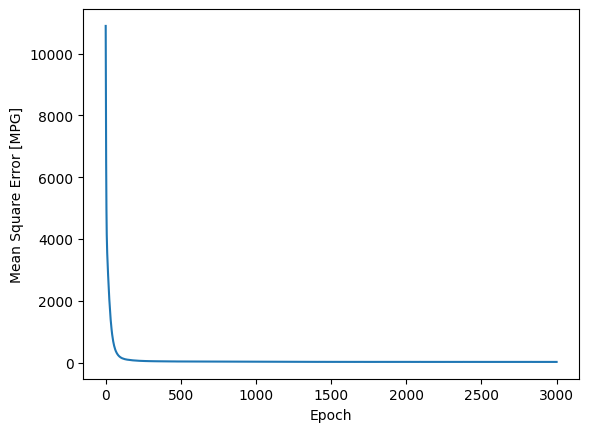

In [17]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [MPG]')
    plt.plot(hist['epoch'], hist['mse'],
             label='Train Error')

    plt.show()
#Adam
plot_history(history)

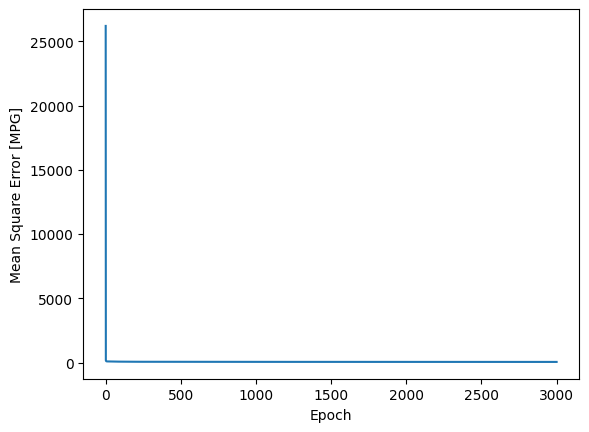

In [18]:
#SDK
plot_history(history_1)

### Make predictions

Calculate testing test mean squared error

In [19]:
_, mse = model.evaluate(test_data, test_targets, verbose=0)

print("Adam: Testing set Mean Squared Error: {:5.2f}".format(mse))

#evaluate 印出的值是loss, accuracy(metric)
#"_"代表最後一次執行的結果，或暫時性/不重要的變數
#verbose = 0 代表不要輸出任何紀錄訊息
#verbose = 1 表不輸出進度條紀錄，是default，
#會出現4/4 [==============================] - 0s 972us/step - loss: 24.4064 - mse: 24.4064

_, mse_1 = model_1.evaluate(test_data, test_targets, verbose=0)

print("SDK: Testing set Mean Squared Error: {:5.2f}".format(mse_1))


Adam: Testing set Mean Squared Error: 23.81
SDK: Testing set Mean Squared Error: 65.58


Finally, predict housing price using data in the testing set:

4/4 [==============================] - 0s 0s/step


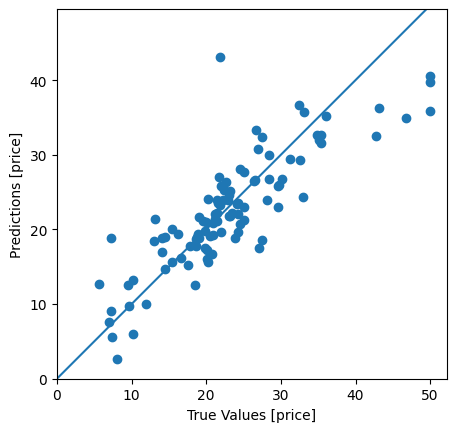

In [20]:
test_predictions = model.predict(test_data).flatten()

plt.scatter(test_targets, test_predictions)
plt.xlabel('True Values [price]')
plt.ylabel('Predictions [price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100]) #diagonal line

4/4 [==============================] - 0s 0s/step


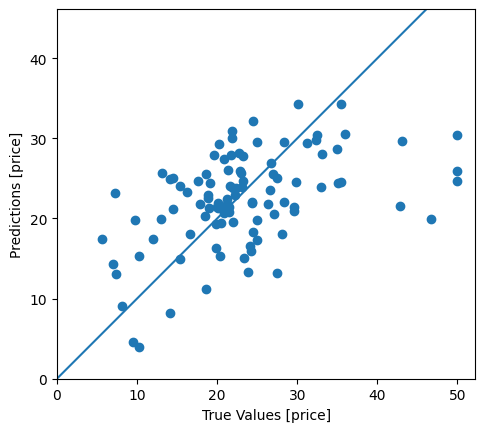

In [21]:
test_predictions_1 = model_1.predict(test_data).flatten()

plt.scatter(test_targets, test_predictions_1)
plt.xlabel('True Values [price]')
plt.ylabel('Predictions [price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100]) #diagonal line